In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

In [23]:

models  = ['Popularity', "CDAE", "AutoEnc", "AutoEnc - Content"]

# top
metrics1 = {'ndcg_at.5': 0.18642706, 'ndcg_at.10': 0.17668146, 
           'MAP': 0.07314954512052294, 'converge': 0.011899999999999999, 
           'personalization': 0.3431346693386773}

# cdae
metrics2 = {'ndcg_at.5': 0.4070932, 'ndcg_at.10': 0.37473607, 
           'MAP': 0.19056025023117637, 'converge': 0.0655, 
           'personalization': 0.7248625250501002}


# auto_enc
metrics3 = {'ndcg_at.5': 0.39791715, 'ndcg_at.10': 0.36289847, 
           'MAP': 0.1673761508054508, 'converge': 0.1066, 
           'personalization': 0.8629803607214429}

# auto_enc_content
metrics4 = {'ndcg_at.5': 0.48122454, 'ndcg_at.10': 0.4398251, 
           'MAP': 0.22503814392412722, 'converge': 0.09449999999999999, 
           'personalization': 0.8554112224448898}



(0, 1)

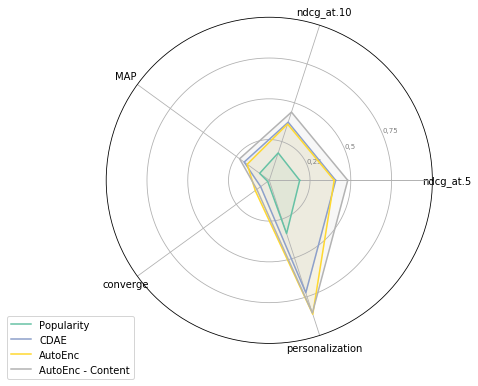

In [28]:
'''
Plot Metrics in Angle 
'''

def get_values(metrics):
    
    labels = list(metrics.keys())
    stats  = list(metrics.values())
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats  = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))

    return labels, stats, angles
    
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, polar=True)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", 4)

# top
labels, stats, angles = get_values(metrics1)
ax.plot(angles, stats, color=my_palette(0), linewidth=1.5, linestyle='solid', label="Popularity")
ax.fill(angles, stats, color=my_palette(0),  alpha=0.1)

# cdae
labels, stats, angles = get_values(metrics2)
ax.plot(angles, stats, color=my_palette(1), linewidth=1.5, linestyle='solid', label="CDAE")
ax.fill(angles, stats, color=my_palette(1), alpha=0.1)

# AutoEnc
labels, stats, angles = get_values(metrics3)
ax.plot(angles, stats, color=my_palette(2), linewidth=1.5, linestyle='solid', label="AutoEnc")
ax.fill(angles, stats, color=my_palette(2), alpha=0.1)

# AutoEnc - Content
labels, stats, angles = get_values(metrics4)
ax.plot(angles, stats, color=my_palette(3), linewidth=1.5, linestyle='solid', label="AutoEnc - Content")
ax.fill(angles, stats, color=my_palette(3),  alpha=0.1)

ax.set_thetagrids(angles * 180/np.pi, labels)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.yticks([0.25,0.5, 0.75], ["0,25","0,5", "0,75"], color="grey", size=7)
plt.ylim(0,1)

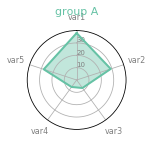

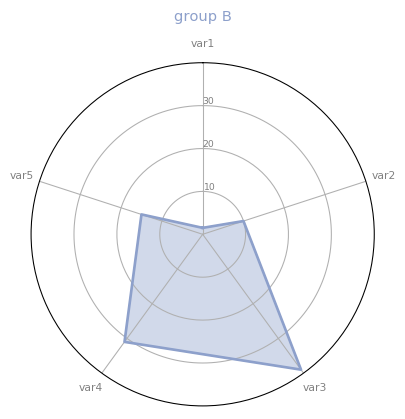

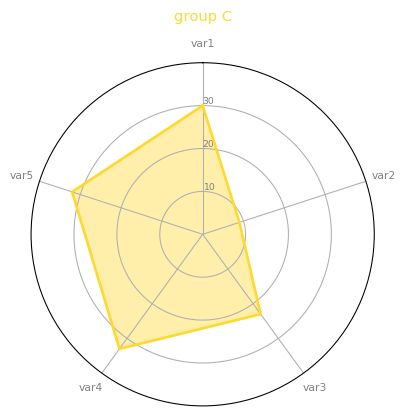

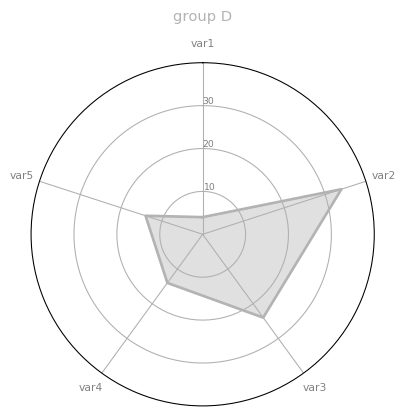

In [19]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))